<a href="https://colab.research.google.com/github/jk74u/FAIDM-Diabetes-Project/blob/main/Mainlogic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:

# Section 1: Install additional libraries and import all packages

# Install libraries for SMOTE & Visualisation
!pip install imbalanced-learn yellowbrick -q

# Data Manipulation
import pandas as pd
import numpy as np

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.impute import SimpleImputer

# Classification Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Clustering
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA

# Evaluation Metrics
from sklearn.metrics import (
    confusion_matrix, classification_report, accuracy_score,
    f1_score, silhouette_score
)

# Class Imbalance
from imblearn.over_sampling import SMOTE

# Visualisation Helpers
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# Settings
import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

print("All libraries imported successfully!")

All libraries imported successfully!


In [38]:
# Section 2: Loading the dataset
from google.colab import files
uploaded = files.upload()

#data into panda dataframe
df = pd.read_csv('CDC_Diabetes_Dataset.csv')
print(" Loading successful")
print(" Shape:" , df.shape)

Saving CDC_Diabetes_Dataset.csv to CDC_Diabetes_Dataset (3).csv
 Loading successful
 Shape: (253680, 22)


In [39]:
# data integrity load check
print("First 5 rows:")
df.head()

First 5 rows:


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [40]:
#data types and other info
print("Shape:" , df.shape)
print("\nData Types:\n" , df.dtypes)
print("\nData Types:\n" , df.dtypes)
df.info()

Shape: (253680, 22)

Data Types:
 Diabetes_012            float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object

Data Types:
 Diabetes_012            float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDisea

In [41]:
# missing values check
print("Missing Values:")
print(df.isnull().sum())
print("\nTotal missing values:")
print(df.isnull().sum().sum())
# duplicate check
print("\nDuplicate Rows:")
print(df.duplicated().sum())
print("Dataset shape with duplicates")
print(df.shape)
df = df.drop_duplicates()
print("Dataset shape without duplicates")
print(df.shape)


Missing Values:
Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

Total missing values:
0

Duplicate Rows:
23899
Dataset shape with duplicates
(253680, 22)
Dataset shape without duplicates
(229781, 22)


In [42]:
# descriptive statistics
print("Summary statistics:")
df.describe().round(2)


Summary statistics:


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,229781.00,229781.00,229781.00,229781.00,229781.00,229781.00,229781.00,229781.0,229781.00,229781.00,...,229781.00,229781.00,229781.00,229781.00,229781.00,229781.00,229781.00,229781.00,229781.00,229781.00
mean,0.33,0.45,0.44,0.96,28.69,0.47,0.04,0.1,0.73,0.61,...,0.95,0.09,2.60,3.51,4.68,0.19,0.44,8.09,4.98,5.89
std,0.72,0.50,0.50,0.20,6.79,0.50,0.21,0.3,0.44,0.49,...,0.23,0.29,1.06,7.71,9.05,0.39,0.50,3.09,0.99,2.09
min,0.00,0.00,0.00,0.00,12.00,0.00,0.00,0.0,0.00,0.00,...,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00
25%,0.00,0.00,0.00,1.00,24.00,0.00,0.00,0.0,0.00,0.00,...,1.00,0.00,2.00,0.00,0.00,0.00,0.00,6.00,4.00,5.00
50%,0.00,0.00,0.00,1.00,27.00,0.00,0.00,0.0,1.00,1.00,...,1.00,0.00,3.00,0.00,0.00,0.00,0.00,8.00,5.00,6.00
75%,0.00,1.00,1.00,1.00,32.00,1.00,0.00,0.0,1.00,1.00,...,1.00,0.00,3.00,2.00,4.00,0.00,1.00,10.00,6.00,8.00
max,2.00,1.00,1.00,1.00,98.00,1.00,1.00,1.0,1.00,1.00,...,1.00,1.00,5.00,30.00,30.00,1.00,1.00,13.00,6.00,8.00


In [51]:
# Section 1: Install additional libraries and import all packages

# Install libraries for SMOTE & Visualisation
!pip install imbalanced-learn yellowbrick -q

# Data Manipulation
import pandas as pd
import numpy as np

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.impute import SimpleImputer

# Classification Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Clustering
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA

# Evaluation Metrics
from sklearn.metrics import (
    confusion_matrix, classification_report, accuracy_score,
    f1_score, silhouette_score
)

# Class Imbalance
from imblearn.over_sampling import SMOTE

# Visualisation Helpers
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# Settings
import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

print("All libraries imported successfully!")

All libraries imported successfully!


value distribution
Diabetes_012
0.0    190055
2.0     35097
1.0      4629
Name: count, dtype: int64
percentage:
Diabetes_012
0.0    82.71
2.0    15.27
1.0     2.01
Name: proportion, dtype: float64


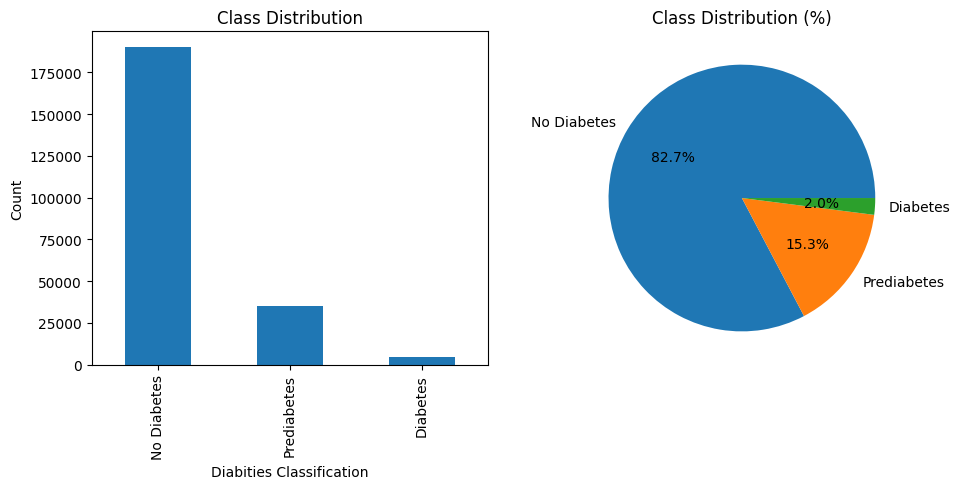

In [55]:
import sys

# Aggressively remove matplotlib and its submodules from sys.modules
# to ensure a complete and clean re-import.
for module in list(sys.modules.keys()):
    if module.startswith('matplotlib'):
        del sys.modules[module]

# Also delete the 'plt' variable if it exists in the current scope
# to ensure a fresh assignment after module reload.
if 'plt' in locals() or 'plt' in globals():
    del plt

# Now, re-import matplotlib.pyplot
import matplotlib.pyplot as plt

# class distribution analysis
print("value distribution")
print(df['Diabetes_012'].value_counts())
print("percentage:")
print(df['Diabetes_012'].value_counts(normalize=True).round(4) * 100)

# visualisation of distribution
fig , axes = plt.subplots(1,2, figsize=(10,5))

# bar chart  of class distribution
df['Diabetes_012'].value_counts().plot(kind='bar', ax=axes[0])
axes[0].set_title('Class Distribution')
axes[0].set_xlabel('Diabities Classification')
axes[0].set_ylabel('Count')
axes[0].set_xticklabels(['No Diabetes', 'Prediabetes', 'Diabetes'])

# pie chart of class distribution
df['Diabetes_012'].value_counts().plot(kind='pie', ax=axes[1] , autopct='%1.1f%%', labels=['No Diabetes', 'Prediabetes', 'Diabetes'])
axes[1].set_title('Class Distribution (%)')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

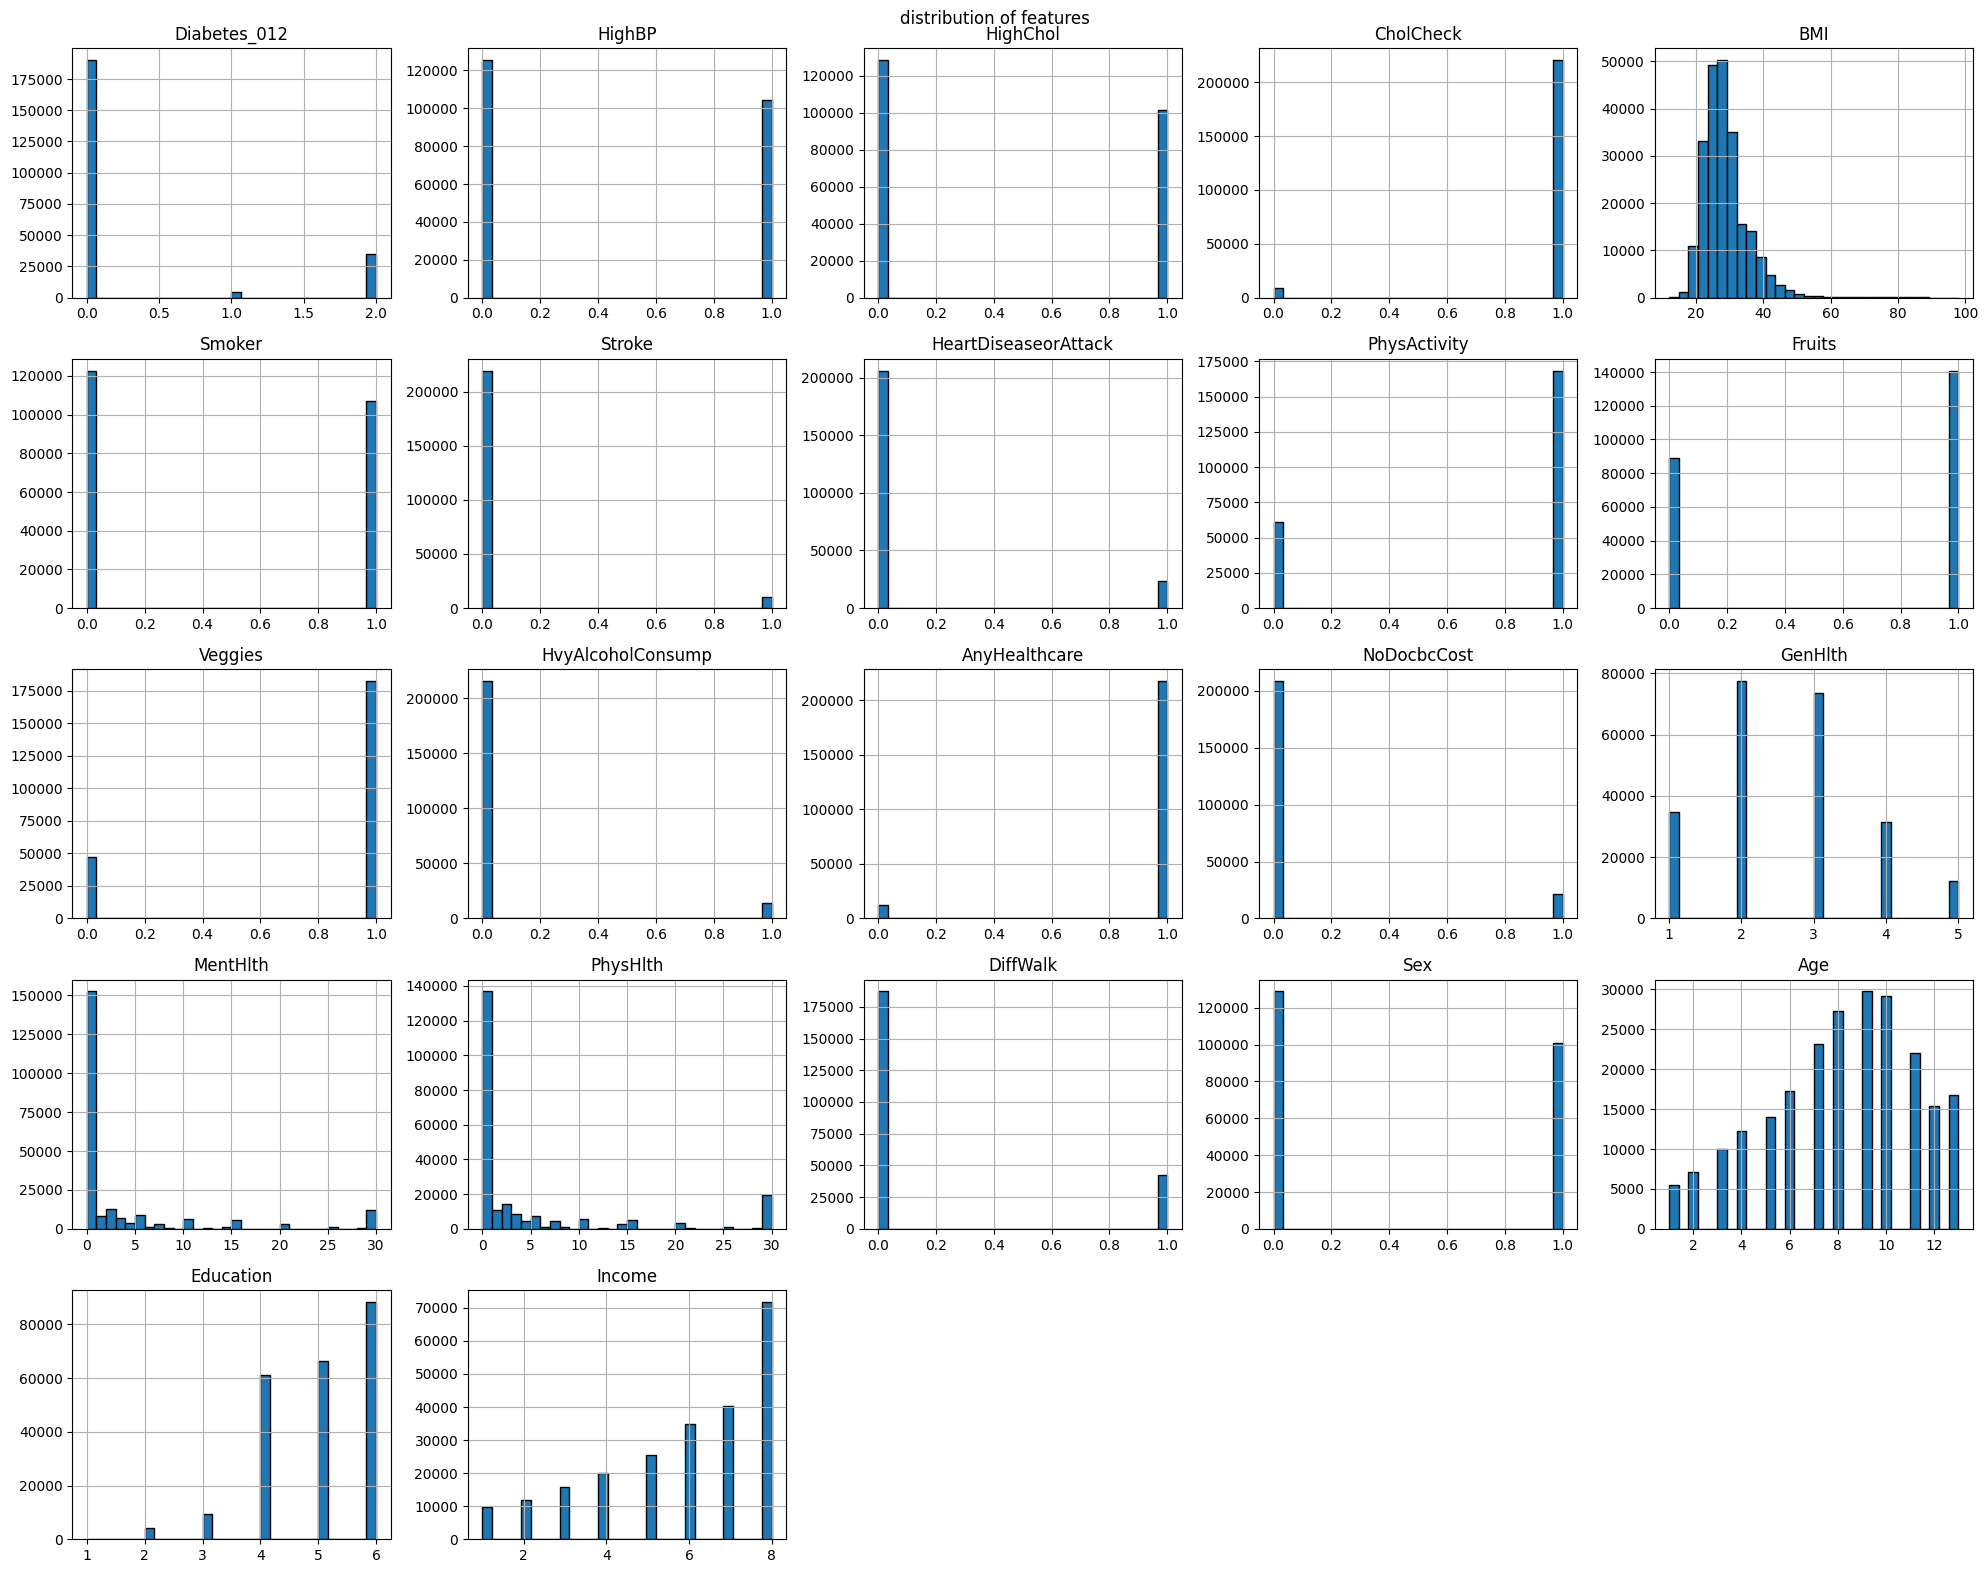

In [56]:
import sys

# Aggressively remove matplotlib and its submodules from sys.modules
# to ensure a complete and clean re-import.
for module in list(sys.modules.keys()):
    if module.startswith('matplotlib'):
        del sys.modules[module]

# Also delete the 'plt' variable if it exists in the current scope
# to ensure a fresh assignment after module reload.
if 'plt' in locals() or 'plt' in globals():
    del plt

# Now, re-import matplotlib.pyplot
import matplotlib.pyplot as plt

# distribution of all features
df.hist(figsize=(20,16), bins=30, edgecolor='black')
plt.suptitle('distribution of features')
plt.tight_layout()
plt.show()

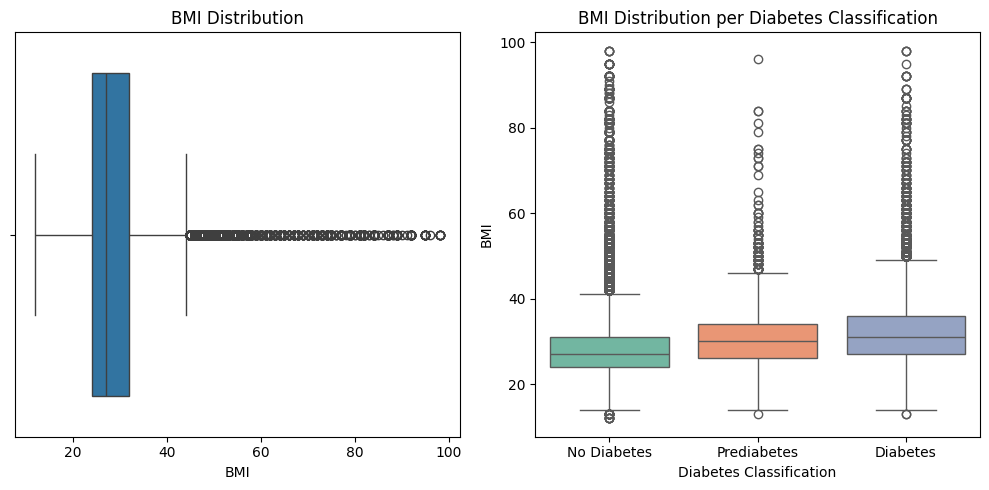

In [58]:
import sys

# Aggressively remove matplotlib and its submodules from sys.modules
# to ensure a complete and clean re-import.
for module in list(sys.modules.keys()):
    if module.startswith('matplotlib'):
        del sys.modules[module]
    if module.startswith('seaborn'): # Also remove seaborn to ensure it reloads with fresh matplotlib
        del sys.modules[module]

# Also delete the 'plt' and 'sns' variables if they exist in the current scope
if 'plt' in locals() or 'plt' in globals():
    del plt
if 'sns' in locals() or 'sns' in globals():
    del sns

# Now, re-import matplotlib.pyplot and seaborn
import matplotlib.pyplot as plt
import seaborn as sns

#BMI box plot to identify outliers
f , axes = plt.subplots(1,2, figsize=(10,5))

sns.boxplot(x=df['BMI'] , ax=axes[0])
axes[0].set_title('BMI Distribution')


#BMI distribution per diabities classification
sns.boxplot(x=df['Diabetes_012'] , y=df['BMI'] , ax=axes[1], palette='Set2')
axes[1].set_title('BMI Distribution per Diabetes Classification')
axes[1].set_xticklabels(['No Diabetes', 'Prediabetes', 'Diabetes'])
axes[1].set_xlabel('Diabetes Classification')
axes[1].set_ylabel('BMI')
plt.tight_layout()
plt.show()

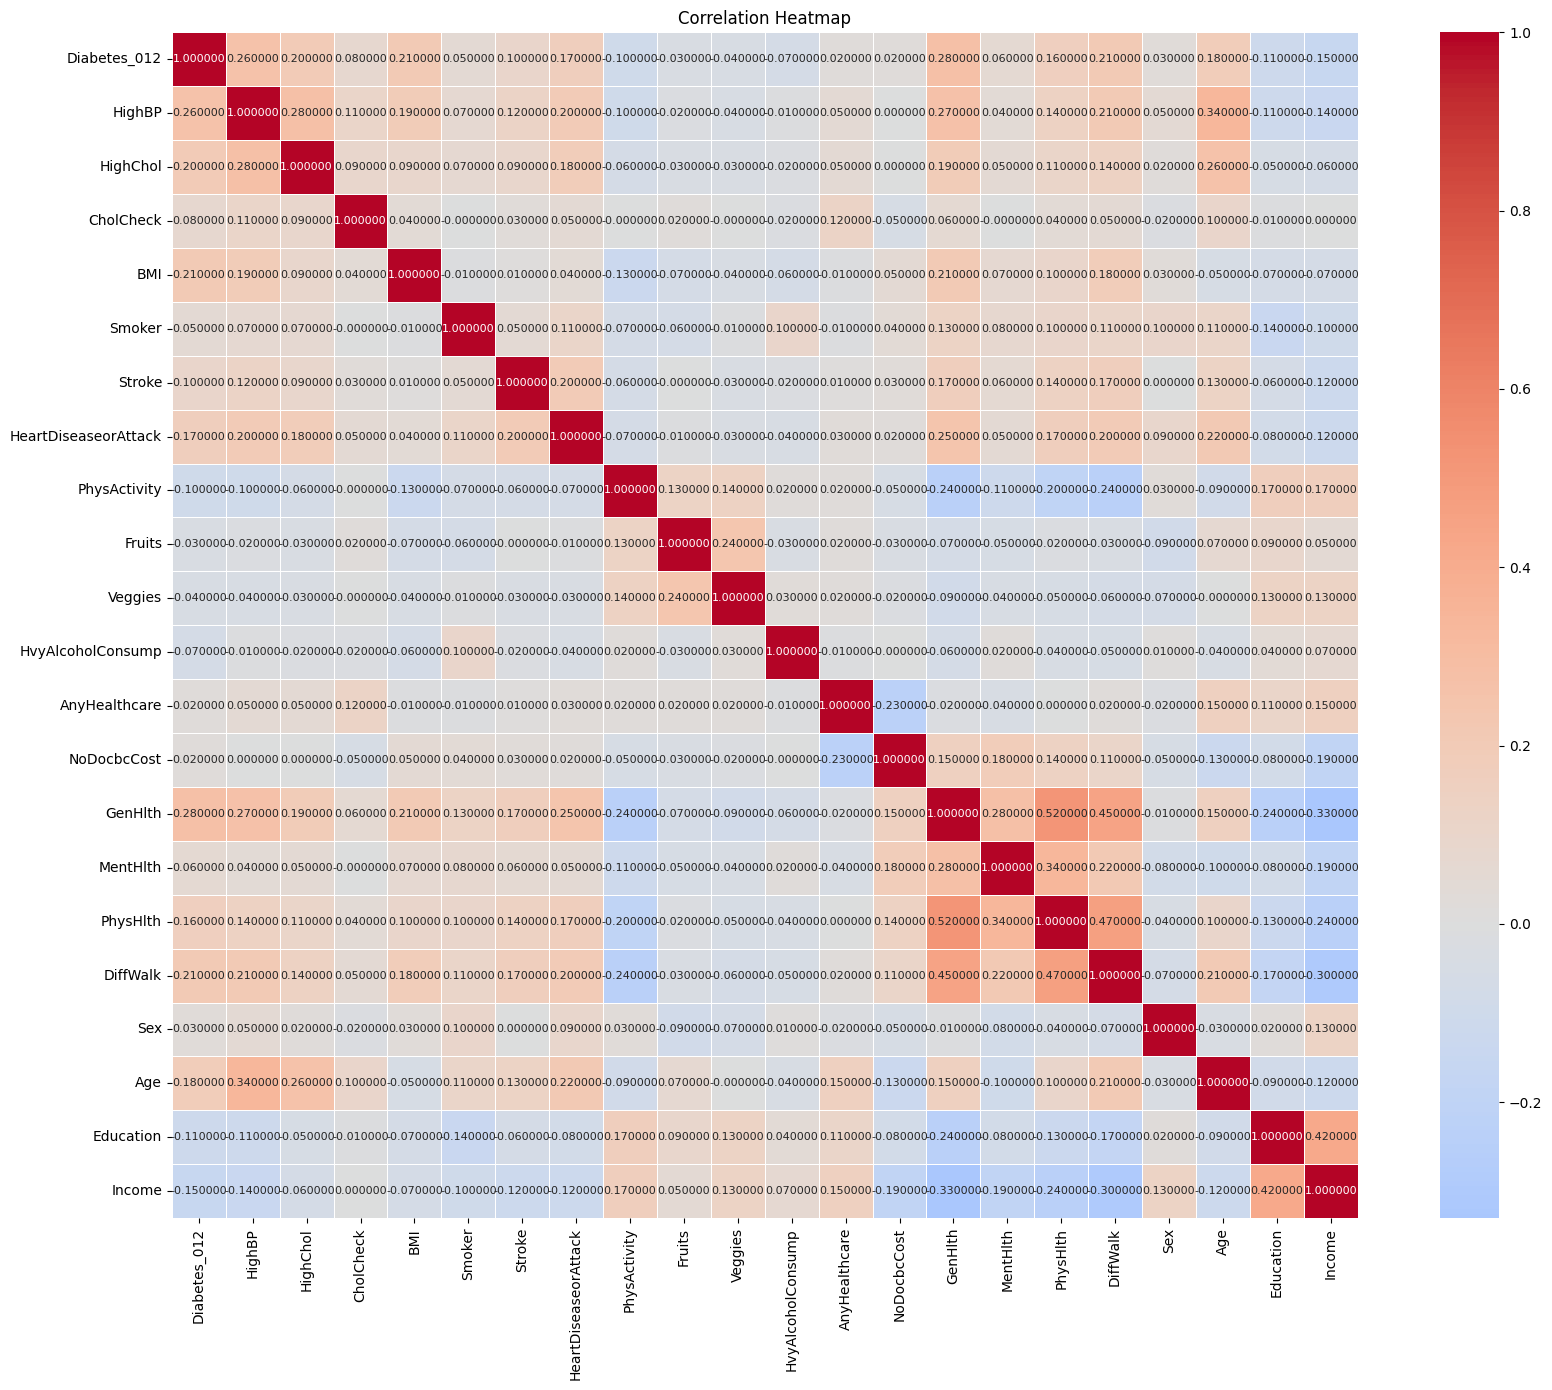

correlation of features with Diabities_012
Diabetes_012            1.00
GenHlth                 0.28
HighBP                  0.26
BMI                     0.21
DiffWalk                0.21
HighChol                0.20
Age                     0.18
HeartDiseaseorAttack    0.17
PhysHlth                0.16
Stroke                  0.10
CholCheck               0.08
MentHlth                0.06
Smoker                  0.05
Sex                     0.03
NoDocbcCost             0.02
AnyHealthcare           0.02
Fruits                 -0.03
Veggies                -0.04
HvyAlcoholConsump      -0.07
PhysActivity           -0.10
Education              -0.11
Income                 -0.15
Name: Diabetes_012, dtype: float64


In [62]:
#heatmap
correlation_matrix = df.corr().round(2)
plt.figure(figsize=(18,14))
sns.heatmap(correlation_matrix, annot=True, fmt='2f' , cmap='coolwarm' , center=0, square=True ,linewidth=0.5, annot_kws={'size': 8})
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

print("correlation of features with Diabities_012")
print(correlation_matrix['Diabetes_012'].sort_values(ascending=False))

mean of each feature in each class: Diabetes_012                0.0        1.0        2.0
HighBP                 0.395175   0.629078   0.752344
HighChol               0.395349   0.620868   0.669459
CholCheck              0.952672   0.986606   0.993133
BMI                   28.030528  30.726075  31.964242
Smoker                 0.455110   0.492763   0.519218
Stroke                 0.035521   0.057248   0.093113
HeartDiseaseorAttack   0.079961   0.143444   0.223837
PhysActivity           0.754055   0.678332   0.628515
Fruits                 0.618526   0.602506   0.584238
Veggies                0.802815   0.768849   0.754908
HvyAlcoholConsump      0.067928   0.044934   0.023706
AnyHealthcare          0.943622   0.945129   0.959484
NoDocbcCost            0.089369   0.129402   0.106619
GenHlth                2.463724   2.976021   3.295894
MentHlth               3.297914   4.531864   4.493404
PhysHlth               4.018805   6.351048   8.008491
DiffWalk               0.148520   0.277598   0

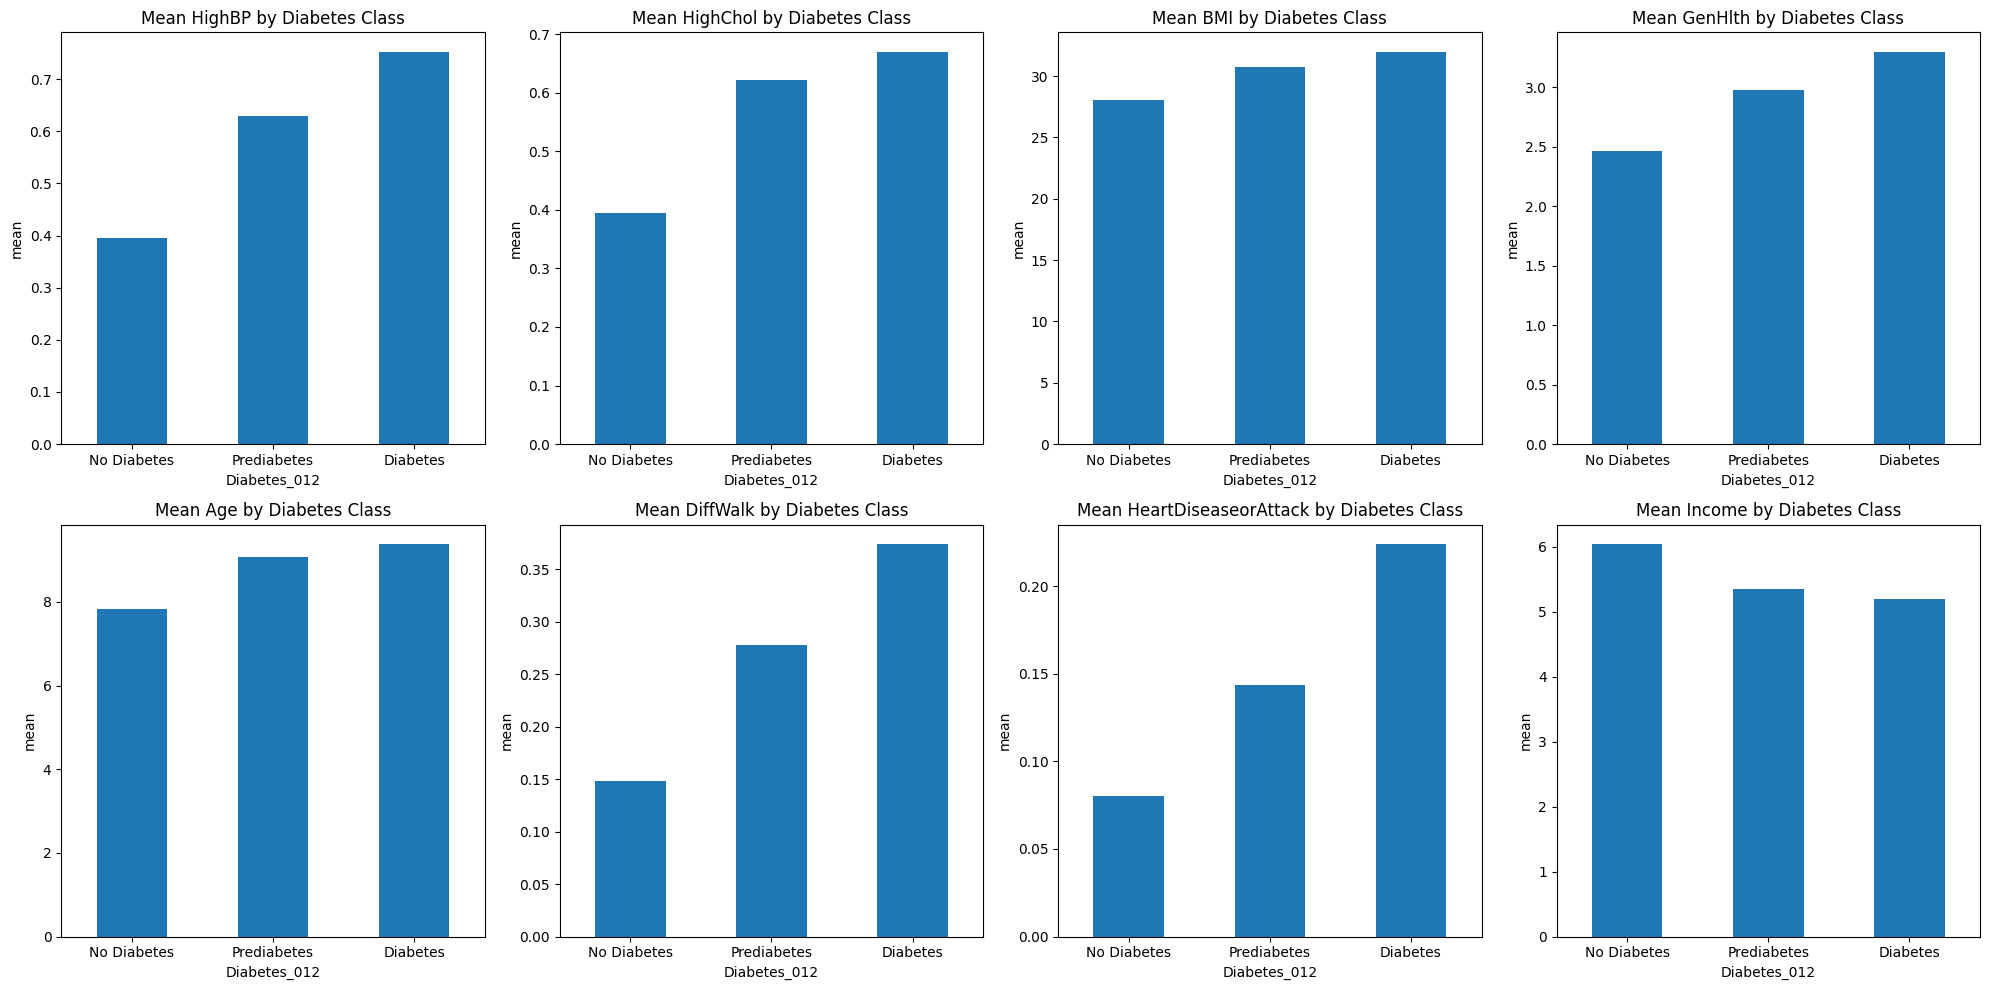

In [67]:
# feature analysis of each diabetes class
class_mean = df.groupby('Diabetes_012').mean()
class_mean.round(3)
print("mean of each feature in each class:", class_mean.T)
#visualisation
key_features = ['HighBP' , 'HighChol' , 'BMI' , 'GenHlth' , 'Age' , 'DiffWalk' , 'HeartDiseaseorAttack' , 'Income']

f, axes = plt.subplots(2,4, figsize=(20, 10))
axes = axes.flatten()

for i,feature in enumerate(key_features):
     df.groupby('Diabetes_012')[feature].mean().plot(kind='bar', ax=axes[i] )
     axes[i].set_title(f'Mean {feature} by Diabetes Class')
     axes[i].set_xticklabels(['No Diabetes', 'Prediabetes', 'Diabetes'] , rotation=0)
     axes[i].set_ylabel('mean')

plt.tight_layout()
plt.show()
